In [1]:
# the following is a set
basket = {'apple','banana','orange'}

In [2]:
# it is un-ordered so it DOES NOT support indexing
basket[1]

TypeError: 'set' object does not support indexing

In [ ]:
# Excersise: What type would you convert this to, to support indexing?
indexable_basket = # ??????????


Here is a reminder of the basic python types
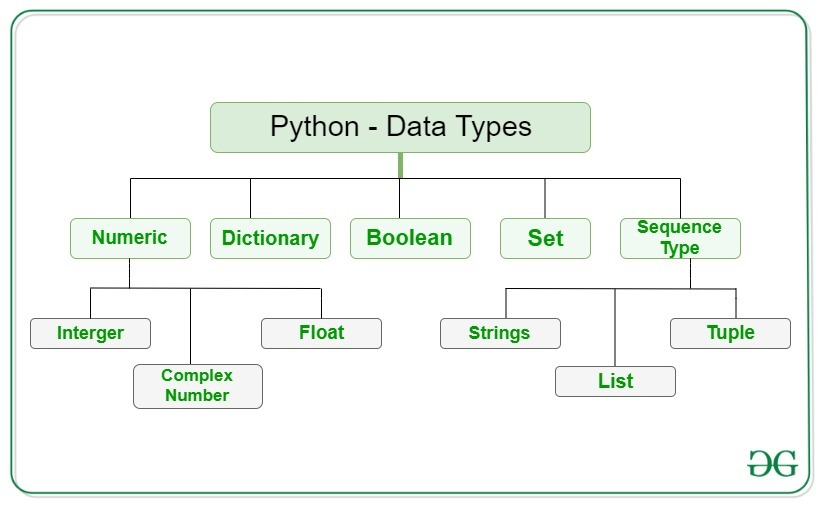

In [3]:
# but it has a length
len(basket)

# you can add things to it
basket.add('soap')
print(basket) # soap was added to the set

# all elements are unique
basket.add('banana')
print(basket) # banana has NOT been added a second time

{'apple', 'orange', 'soap', 'banana'}
{'apple', 'orange', 'soap', 'banana'}


In [4]:
# you can test whether objects exist in the set
'banana' in basket

True

In [5]:
'ginger' in basket # indeed 'ginger' does not exsit in the set

False

In [6]:
# you can also iterate through them
for item in basket :
    print('I bought {}'.format(item))

I bought apple
I bought orange
I bought soap
I bought banana


In [ ]:
# Excersise: Suppose you want encode the fact that we bought two apples and three bananas;
# are sets the right type for storage? Why or why not? What type would you use?
basket_with_counts = ### ??????????


In [7]:
# and finally the most useful are set operations
another_basket = {'soap','banana','eggs','paprika'}

common_items = basket.intersection(another_basket)
print('the {} common items are {}'.format( len(common_items), common_items) )

# check all of the available functions and operations at
# https://docs.python.org/2/library/sets.html

the 2 common items are {'banana', 'soap'}


In [ ]:
# Excersise: use set operations to count the number of items
# that are unique to 'another_basket' and 'basket'

basket = {'apple', 'banana', 'orange', 'soap'}
another_basket = {'soap','banana','eggs','paprika'}

unique_items = ### ???????

In [8]:
from pandas import DataFrame,Index

# lets create a dataset of transactions
transactions = DataFrame({
    'baskets':[
        {'apple', 'banana', 'orange', 'soap'},
        {'soap','banana','eggs','paprika'},
        {'eggs','paprika','banana'},
        {'paprika'},
        {'soap','banana'},
        {'apple', 'orange'},
        {'banana','apple', 'orange'}
    ],
    'sex':['F','M','M','M','M','F','F'],
    'age':[ 44,17,21,32,27,45,35]
})

In [9]:
transactions

,baskets,sex,age
0,"{apple, orange, soap, banana}",F,44
1,"{banana, paprika, soap, eggs}",M,17
2,"{banana, paprika, eggs}",M,21
3,{paprika},M,32
4,"{banana, soap}",M,27
5,"{apple, orange}",F,45
6,"{banana, apple, orange}",F,35


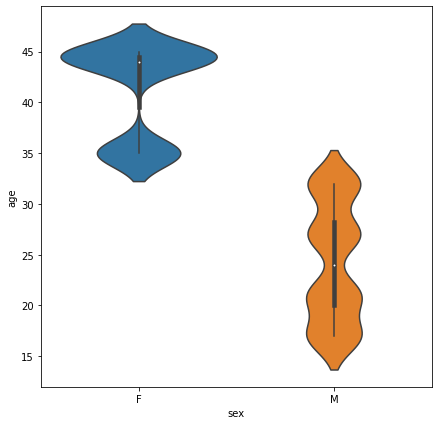

In [10]:
from seaborn import violinplot
from matplotlib.pyplot import figure

# lets use seaborn you're right its a lot prettier :P
figure(figsize=(7,7))
violinplot( data=transactions, y='age', x='sex', bw=1/4 )

In [11]:
# it is useful to expand the baskets items into their own rows
transactions['item'] = transactions.baskets.apply(lambda x: list(x))
transaction_items = transactions.explode('item')

In [12]:
transaction_items

,baskets,sex,age,item
0,"{apple, orange, soap, banana}",F,44,apple
0,"{apple, orange, soap, banana}",F,44,orange
0,"{apple, orange, soap, banana}",F,44,soap
0,"{apple, orange, soap, banana}",F,44,banana
1,"{banana, paprika, soap, eggs}",M,17,banana
1,"{banana, paprika, soap, eggs}",M,17,paprika
1,"{banana, paprika, soap, eggs}",M,17,soap
1,"{banana, paprika, soap, eggs}",M,17,eggs
2,"{banana, paprika, eggs}",M,21,banana
2,"{banana, paprika, eggs}",M,21,paprika


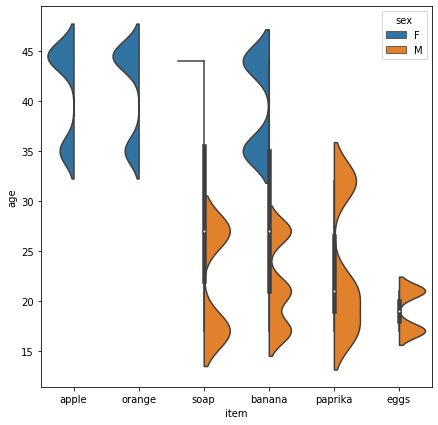

In [13]:
# so that we may more readily compute statistics on them
figure(figsize=(7,7))
violinplot( data=transaction_items, y='age', x='item', bw=1/4, hue='sex', split=True )

In [14]:
# the following shows the common items between customer id = 1 and 3
transactions.baskets[1].intersection(transactions.baskets[3])

from itertools import product
from numpy import zeros

n = len(transactions.index)
counts = zeros((n,n))

# iterate through all possible index pairs
for i,j in product(transactions.index,transactions.index) :
    
    # count number of elements in each intersection
    intersection = transactions.baskets[i].intersection(transactions.baskets[j])
    counts[i,j] = len(intersection)

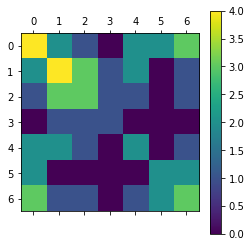

In [15]:
from matplotlib.pyplot import matshow,colorbar

# matplotlib is still useful for basic plotting
matshow(counts)
colorbar();